# BB Run
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 7/31/2021|
|Updated | 8/2/2021|

## Introduction

### Parameters

| BB Run                                               ||| $\tau_\textrm{s}$ | $\epsilon$ | $L_x \times L_y \times L_z$              | $N_x \times N_y \times N_z$ | $N_\textrm{p}$   | $n_\textrm{p}$ | $t_\textrm{sim}$ |
|------------------------------------------------------|||-------------------|------------|------------------------------------------|-----------------------------|------------------|----------------|----------------------------------------|
| [**JY07**](https://doi.org/10.1086/516730) **Units** ||| $1.0$             | $1.0$      | $20.0 \times 20.0 \times 20.0\,[\eta r]$ | $256 \times 1 \times 256$   | $1.6\times 10^6$ | $25$           | $250.0\,\Omega^{-1}$ |
| [**Code Units**](CodeUnits.ipynb)                    ||| $1/(2\pi)$        | $1.0$      | $1.0 \times 1.0 \times 1.0\,[H]$         | $256 \times 1 \times 256$   | $2.6\times 10^5$ | $4$            | $40\,T$                                |

### Performance

| Compute Node | Microarchitecture | Cores/Node | PBS Code | CPU Time (m) | zone-cycles /cpu_second |
|--------------|-------------------|------------|----------|--------------|-------------------------|
| Pleiades     | Broadwell         | 28         | bro      | 17.4         | 1.06e+07                |

### Preliminary

In [1]:
import sys
sys.path.insert(0, '/home/stanley/github/sabaronett/local/athena/athena-dust/vis/python')
import athena_read
from IPython.display import IFrame
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

# Collect .athdf outputs, init sim consts.
athinput = athena_read.athinput('athinput.si')
Omega = athinput['problem']['omega']         # local Keplerian ang. freq.
tau_s = athinput['particles']['taus0']*Omega # dimensionless stopping time
epsilon = athinput['problem']['epsilon']     # avg. BG dust/gas ρ-ratio
T = 2*np.pi/Omega                            # orbital period
outputs = sorted(list(Path('../athdf').glob(athinput['job']['problem_id'] +
                                            '.out2.*.athdf')))

## Particle Density Animation

In [4]:
IFrame('https://www.youtube.com/embed/j-ln0IX7m4U', 560, 315)

## Maximum Particle Density Evolution

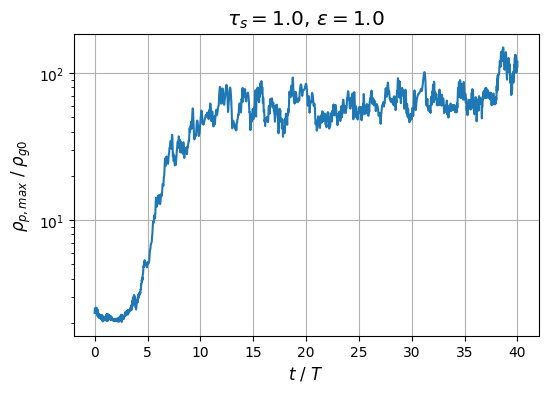

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Load NAS results
data = np.loadtxt('plots/growth.txt')
times = data[:, 0]
rhopmax = data[:, 1]

# Plot
fig, ax = plt.subplots(dpi=100)
ax.set_title(r'$\tau_s={:.1f},\,\epsilon={:.1f}$'
             .format(tau_s, epsilon), size='x-large')
ax.set_ylabel(r'$\rho_{p,max}$ / $\rho_{g0}$', size='large')
ax.set_xlabel(r'$t$ / $T$', size='large')
ax.semilogy(times, rhopmax)
ax.grid()

## Cumulative Particle Density Distribution

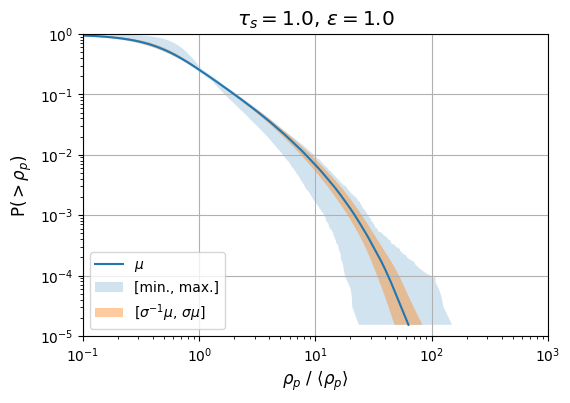

In [3]:
# Load NAS results
data = np.loadtxt('plots/cpdd_min.txt')
cdf = data[:, 1]
min_rhops = data[:, 0]
data = np.loadtxt('plots/cpdd_max.txt')
max_rhops = data[:, 0]
data = np.loadtxt('plots/cpdd_avg.txt')
avg_rhops = data[:, 0]
data = np.loadtxt('plots/cpdd_std.txt')
std_rhops = data[:, 0]

# CPDD
fig, ax = plt.subplots(dpi=100)
ax.set_title(r'$\tau_s={:.1f},\,\epsilon={:.1f}$'
             .format(tau_s, epsilon), size='x-large')
ax.set_xlabel(r'$\rho_p$ / $\langle \rho_p \rangle$', size='large')
ax.set_ylabel(r'P$(>\rho_p)$', size='large')
ax.loglog(avg_rhops, cdf, label=r'$\mu$')
ax.fill_betweenx(cdf, min_rhops, max_rhops, alpha=0.2, label='[min., max.]')
ax.fill_betweenx(cdf, avg_rhops/std_rhops, avg_rhops*std_rhops, alpha=0.4,
                 label=r'$[\sigma^{-1}\mu,\,\sigma\mu]$')
ax.set_xlim(0.1, 1000)
ax.set_ylim(1e-5, 1)
ax.legend(loc='lower left')
ax.grid()

NOTE: All plotted values are calculated over the 

## Tasks
- [ ] Try BB run ($\epsilon = \tau_s = 1$)
  - [x] Run `growth.py`
  - [x] Run `cpdd.py`
  - [x] Set `vmin` & `vmax` in `mov.py` from `growth.pdf`, then run.
  - [ ] JY07-style cmap snapshot at same BB orbital time(s)
  - [ ] Velocity dispersion

In [5]:
2001*100/np.pi/2/40

796.1726028172064